In [27]:
import pandas as pd
import pylab as plt
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

animal_pred='../../paper_data_v2//irat_enet/results/animal_predictions/combined_results.csv'

In [31]:
af=pd.read_csv(animal_pred,index_col=0)
erisk=af.emergence_risk.values
erisk=af


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 4.98758] [loc=4.821 scale=1.123]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 3.50477] [loc=3.800 scale=1.021]
[distfit] >INFO> [pareto    ] [0.18 sec] [RSS: 3.12301] [loc=0.039 scale=3.761]
[distfit] >INFO> [dweibull  ] [0.11 sec] [RSS: 4.68779] [loc=4.821 scale=1.130]
[distfit] >INFO> [t         ] [0.11 sec] [RSS: 4.98759] [loc=4.821 scale=1.122]
[distfit] >INFO> [genextreme] [0.71 sec] [RSS: 3.96855] [loc=3.828 scale=0.180]
[distfit] >INFO> [gamma     ] [0.23 sec] [RSS: 1.97145] [loc=3.800 scale=0.817]
[distfit] >INFO> [lognorm   ] [0.45 sec] [RSS: 3.91016] [loc=3.800 scale=1.714]
[distfit] >INFO> [beta      ] [0.39 sec] [RSS: 3.37768] [loc=3.800 scale=3.292]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 4.5918] [loc=3.800 scale=2.982]
[distfit] >INFO> [loggamma  ] [0.20 sec] [RSS: 4.99165] [loc=-297.128 scale=41.776]


{'y': array([6.6]),
 'y_proba': array([0.00299289]),
 'y_pred': array(['up'], dtype='<U4'),
 'P': array([0.00299289]),
 'y_bool': array([ True]),
 'df':      y   y_proba y_pred         P
 0  6.6  0.002993     up  0.002993}

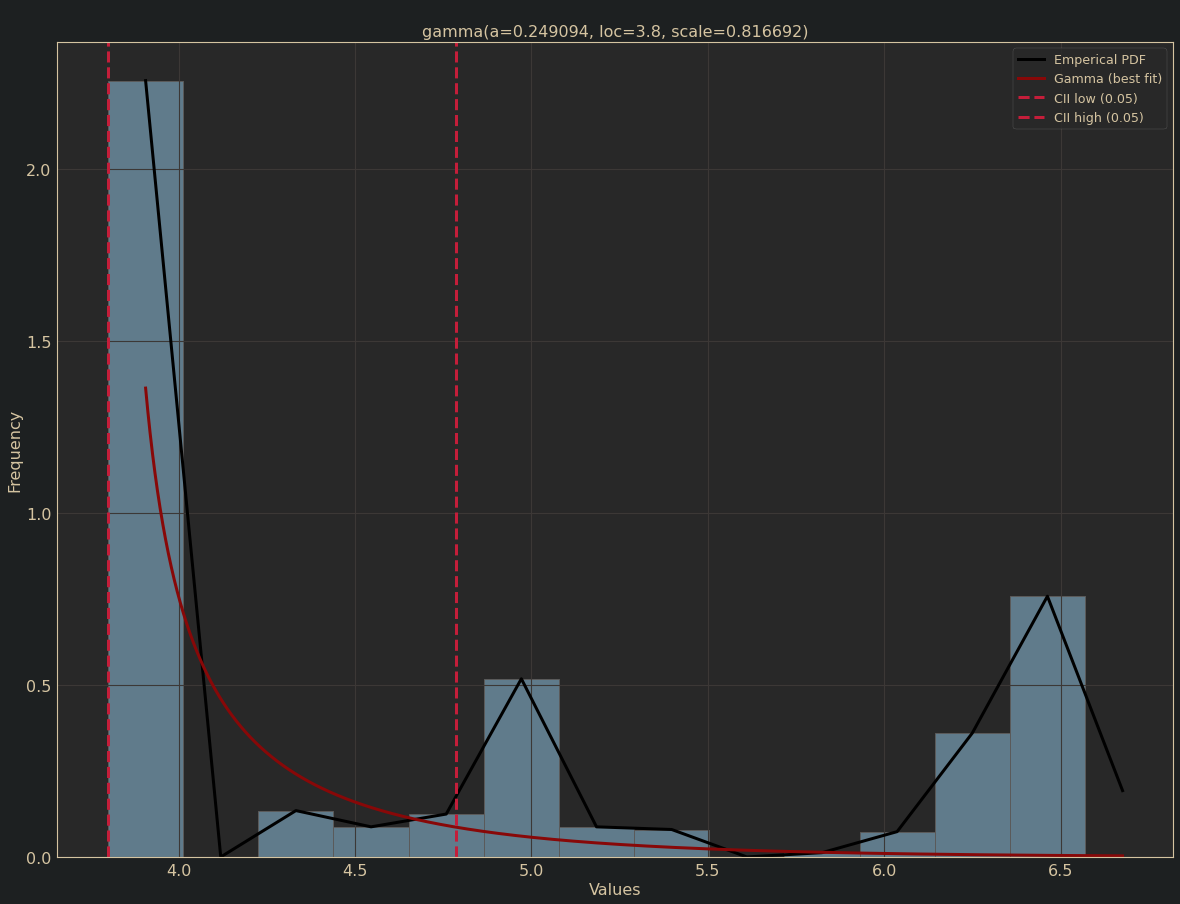

In [32]:
from distfit import distfit
dfit = distfit(n_boots=3)
dfit.fit_transform(erisk)
dfit.plot()
dfit.predict([6.6])

In [33]:
dfit.predict([6.7])

{'y': array([6.7]),
 'y_proba': array([0.00259093]),
 'y_pred': array(['up'], dtype='<U4'),
 'P': array([0.00259093]),
 'y_bool': array([ True]),
 'df':      y   y_proba y_pred         P
 0  6.7  0.002591     up  0.002591}

In [44]:
import numpy as np
qrisk=np.array([1/(np.array(eval(x)).mean()) for x in af.ha_risk.values])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.03 sec] [RSS: 0.0164453] [loc=24.917 scale=34.089]
[distfit] >INFO> [pareto    ] [1.69 sec] [RSS: 0.00385805] [loc=-0.001 scale=1.741]
[distfit] >INFO> [loglaplace] [5.16 sec] [RSS: 0.00152959] [loc=1.740 scale=3.026]


{'y': array([120]),
 'y_proba': array([0.02093719]),
 'y_pred': array(['up'], dtype='<U4'),
 'P': array([0.02093719]),
 'y_bool': array([ True]),
 'df':        y   y_proba y_pred         P
 0  120.0  0.020937     up  0.020937}

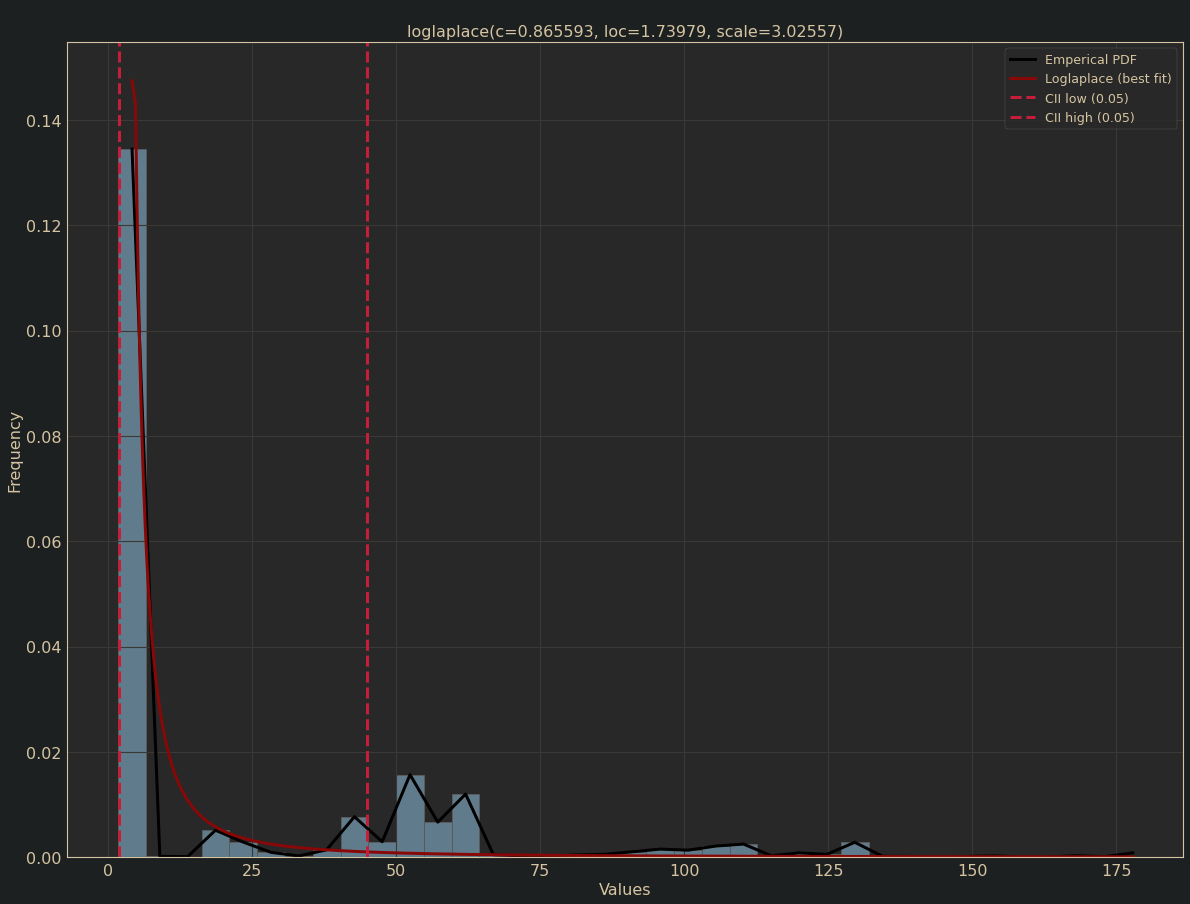

In [82]:
from distfit import distfit
dfit = distfit(distr=['norm','pareto','loglaplace'],n_boots=10)
dfit.fit_transform(qrisk)
dfit.plot()
dfit.predict([120])

# af['qrisk']=qrisk

<AxesSubplot:>

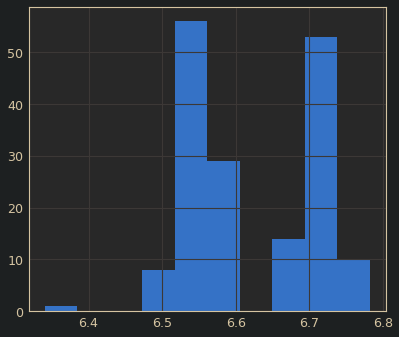

In [76]:
af[af.qrisk>120].emergence_risk.hist()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.11 sec] [RSS: 38.2539] [loc=6.591 scale=0.120]       


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\nnorm(loc=6.59117, scale=0.119623)'}, xlabel='Values', ylabel='Frequency'>)

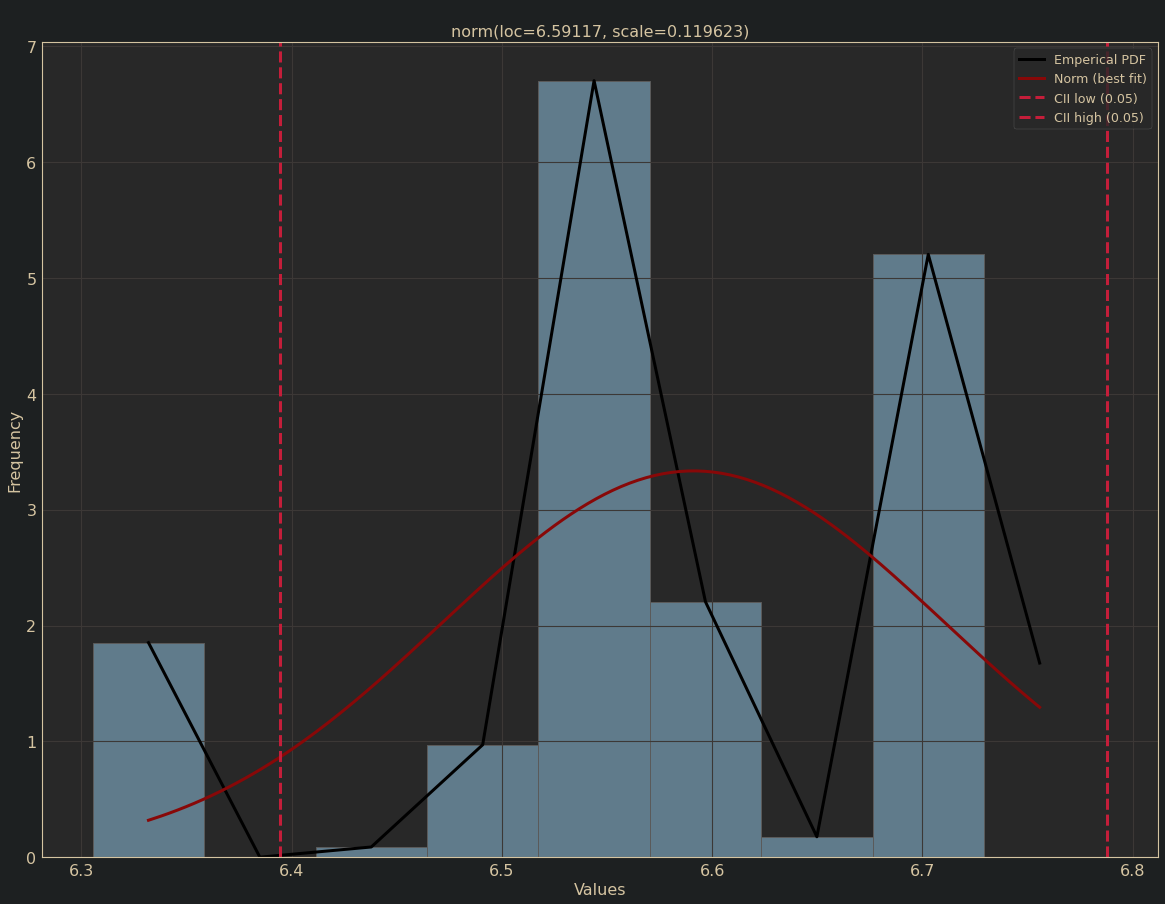

In [77]:
dat=af[af.qrisk>110].emergence_risk.values
from distfit import distfit
dfit = distfit(distr='norm',n_boots=10)
dfit.fit_transform(dat)
dfit.plot()
#dfit.predict([6.6])